# This python notebook only shows how to converte PDF files to PNG

## To do so, 1) install the following requiriments:

### In your linux distribution:
    libmagickwand-dev ghostscript 

### In your pip distribution:
    wand==0.4.4
    ghostscript==0.4.1
    opencv3==3.2.0
    
# Case you are using the Dockerfile it is already there! 
# Upload your image and Enjoy!!!

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import urllib
import glob

In [20]:
#Let's load and save some pdf files
url = 'http://www.camara.gov.br/cota-parlamentar/documentos/publ/2437/2015/5645173.pdf'
file_name='5645173.pdf'
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    data = response.read() # a `bytes` object
    out_file.write(data)

In [21]:
#Let's load and save some pdf files
url = 'http://www.camara.gov.br/cota-parlamentar/documentos/publ/2437/2015/5645177.pdf'
file_name='5645177.pdf'
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    data = response.read() # a `bytes` object
    out_file.write(data)

In [4]:
print (glob.glob('5645173.pdf'))
print (glob.glob('5645177.pdf'))

['5886345.pdf']
['5886361.pdf']


# Now let's convert the downloaded pdf to images

In [8]:
from __future__ import print_function
from wand.image import Image

with Image(filename='5645173.pdf', resolution=300) as img:
    img.compression_quality = 99
    print('width =', img.width)
    print('height =', img.height)
    print('pages = ', len(img.sequence))
    print('resolution = ', img.resolution)

    with img.convert('png') as converted:
        converted.save(filename='5645173.png')
file_name1='5645173.png'

width = 2479
height = 3508
pages =  1
resolution =  (300, 300)


In [9]:
from __future__ import print_function
from wand.image import Image

with Image(filename='5645177.pdf', resolution=300) as img:
    img.compression_quality = 99
    print('width =', img.width)
    print('height =', img.height)
    print('pages = ', len(img.sequence))
    print('resolution = ', img.resolution)

    with img.convert('png') as converted:
        converted.save(filename='5645177.png')
file_name2='5645177.png'

width = 2479
height = 3508
pages =  1
resolution =  (300, 300)


## Great they were converted!

# Let's use SIFT to extract features from these images!

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


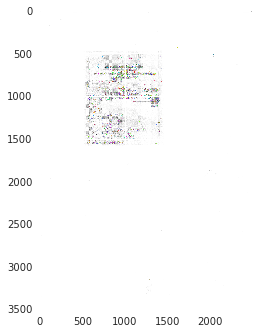

(<matplotlib.image.AxesImage at 0x7f69f3327f60>, None)

In [10]:
import cv2
import numpy as np

img = cv2.imread(file_name1)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift=cv2.xfeatures2d.SIFT_create()
kp=sift.detect(gray,None)
img=cv2.drawKeypoints(gray, kp, img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('sift_keypoints.jpg',img)
plt.imshow(img,),plt.show()        

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


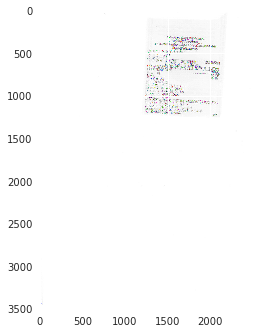

(<matplotlib.image.AxesImage at 0x7f69f31d1438>, None)

In [11]:
import cv2
import numpy as np

img = cv2.imread(file_name2, 1)

gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift=cv2.xfeatures2d.SIFT_create()
kp=sift.detect(gray,None)
img=cv2.drawKeypoints(gray, kp, img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints2.jpg',img)

plt.imshow(img,),plt.show()

# SIFT done! Go to our directory and check the generated files

## Let's play with 2 images and see whether we can match common keypoints between them

## I took the next algorithm from here:
http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


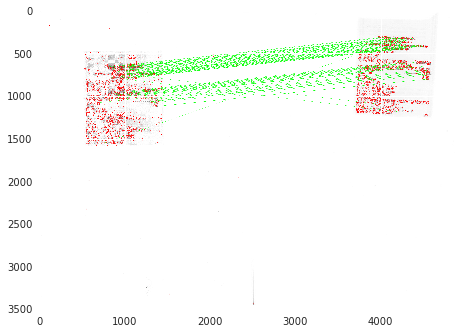

(<matplotlib.image.AxesImage at 0x7f69f292fbe0>, None)

In [12]:
img1 = cv2.imread(file_name1,0)          # queryImage
img2 = cv2.imread(file_name2,0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
cv2.imwrite('macht_keypoints.jpg',img3)
plt.imshow(img3,),plt.show()        

## Great it works! We can work with these parsed images :D

### So, following steps:

### Goal: to build a ML classifier to detect duplicated reimbursiments.

### I plain to follow  steps hereafter:

#### 1- Convert these pdfs to images
#### 2- Extract SIFT features from them
#### 3- Create a bag of visual words
#### 4- Run a ML method to get the duplicated reimbursements
            
            
### !! What i have done so far !!
    Steps 1 and 2 
    For the nexts steps i will follow these approaches:
    
    http://www.robots.ox.ac.uk/~vgg/publications/2006/Sivic06c/sivic06c.pdf
    
    https://ianlondon.github.io/blog/how-to-sift-opencv/
    
    ### I did something similar before. Where i got the Scenes of a movie using an image as input
    ### I coded it on matlab, so i can't to use it here directly.
    ### However, i noticed some good code on github which we can adapt to our problem:
    ### Look at my repository: 
    https://github.com/silviodc/general_img_classifier
    https://github.com/silviodc/Bag-of-Visual-Words-Python
    
### My main concerns about to use only the images are:
##### The recuperation of similar images refering to diferent reimbursements.
##### --- It can be from any politician, 
#### ---- I guess our approach must to preserve for more precision at the begining (*It is good to market )

### About these similar images check the issue: https://github.com/datasciencebr/serenata-de-amor/issues/32
##### ---- So, i also will try to combine the sift descriptors and other information. 


In [22]:
import glob
from __future__ import print_function
from wand.image import Image

def convert_pdf_png_and_save(file_name,new_file_name):
    """Convert a pdf file to png and save it at disk

    arguments:
    file_name -- the real path to access the pdf file on disk
    new_file_name -- my_path/12312.png
    """
    #Default arguments to read the file and has a good resolution
    with Image(filename=file_name, resolution=300) as img:
        img.compression_quality = 99
        print('width =', img.width)
        print('height =', img.height)
        print('pages = ', len(img.sequence))
        print('resolution = ', img.resolution)

        #Format choosed to convert the pdf to image
        with img.convert('png') as converted:
            converted.save(filename=new_file_name)
            

pdf_directory="../data/training set/not_wrong/"
            
#Get the pdfs files downloaded in our folder, e.g., /data
pdfs = glob.glob(pdf_directory+'*.pdf')

#Case we have pdf files we convert the pdf_files_name to doc_ids
for file in pdfs:
    full_name= file.split("/")
    file_name = full_name[len(full_name)-1]
    file_name= file_name.split(".pdf")
    file_name= pdf_directory+file_name[0]+".png"
    convert_pdf_png_and_save(file,file_name)

            

width = 2488
height = 3508
pages =  1
resolution =  (300, 300)
width = 2488
height = 3513
pages =  1
resolution =  (300, 300)
width = 2488
height = 3513
pages =  1
resolution =  (300, 300)
width = 2488
height = 3508
pages =  1
resolution =  (300, 300)
width = 2488
height = 3513
pages =  1
resolution =  (300, 300)
width = 2488
height = 3508
pages =  1
resolution =  (300, 300)
width = 2488
height = 3513
pages =  1
resolution =  (300, 300)
width = 2488
height = 3508
pages =  1
resolution =  (300, 300)
width = 2488
height = 3508
pages =  1
resolution =  (300, 300)
width = 2488
height = 3508
pages =  1
resolution =  (300, 300)
width = 2488
height = 3508
pages =  1
resolution =  (300, 300)
width = 2488
height = 3513
pages =  1
resolution =  (300, 300)
width = 2488
height = 3513
pages =  1
resolution =  (300, 300)
width = 2488
height = 3513
pages =  1
resolution =  (300, 300)
width = 2488
height = 3513
pages =  1
resolution =  (300, 300)
width = 2488
height = 3513
pages =  1
resolution =  (30

In [1]:
import visual_bow as bow
import cv2
import numpy as np
import glob
import os
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

OpenCV VERSION (should be 3.1.0 or later, with nonfree modules installed!): 3.2.0


/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
def binary_labeled_img_from_folder(positive_folder, cal101_root='../data/training set/ML/', image_suffix='*.png'):
    """
    Generate a balanced dataset of positive and negative images from a directory of images
    where each type of image is separated in its own folder.

    Returns:
    --------
    labeled_img_paths: list of lists
        Of the form [[image_path, label], ...]
        Where label is True or False for positive and negative images respectively
    """
    all_imgs = set(glob.glob(cal101_root + '/*/' + image_suffix))
    pos_imgs = set(glob.glob(os.path.join(cal101_root, positive_folder) + '/' + image_suffix))
    
    neg_imgs = all_imgs - pos_imgs

    neg_sample_size = len(pos_imgs)
    selected_negs = np.random.choice(list(neg_imgs), size=neg_sample_size, replace=False)

    print ('{} positive, {} negative images selected (out of {} negatives total)'.format(
        len(pos_imgs), len(selected_negs), len(neg_imgs)))

    labeled_img_paths = [[path, True] for path in pos_imgs] + [[path, False] for path in selected_negs]

    return np.array(labeled_img_paths)


In [6]:
positive_folder = 'wrong'
imgs = binary_labeled_img_from_folder(positive_folder)

125 positive, 125 negative images selected (out of 273 negatives total)


In [ ]:
X_train, X_test, y_train, y_test, kmeans = bow.gen_bow_features(imgs, test_train_ratio=0.8, K_clusters=750)

generating SIFT descriptors for 250 images


In [ ]:
c_vals = [0.0001, 0.01, 0.1, 1, 5, 10, 100, 1000]

param_grid = [
  {'C': c_vals, 'kernel': ['linear']},
  {'C': c_vals, 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
 ]

svc = GridSearchCV(SVC(), param_grid, n_jobs=-1)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

In [ ]:
svc.best_estimator_

# We have our estimator, let's try on a new picture

In [ ]:
for img_path in ['kanye_glasses.jpeg', 
                 'kanye_glasses2.jpeg', 
                 'more_pandas/0001.jpeg', 
                 '101_ObjectCategories/brontosaurus/image_0001.jpg',
                 '101_ObjectCategories/brontosaurus/image_0002.jpg',
                 '101_ObjectCategories/dalmatian/image_0001.jpg',
                 '101_ObjectCategories/dalmatian/image_0002.jpg'
                ]:
    print img_path, svc.predict(bow.img_to_vect(img_path, kmeans))